# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import numpy as np

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [26]:
loans = pd.read_csv("loan_data.csv")

** Check out the info(), head(), and describe() methods on loans.**

In [27]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [28]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [29]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

<Axes: >

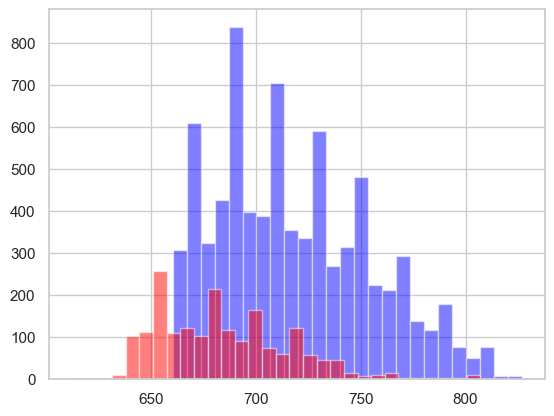

In [31]:
loans[loans['credit.policy'] == 1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='Credit Policy = 1')
loans[loans['credit.policy'] == 0]['fico'].hist(alpha=0.5, color='red', bins=30, label='Credit Policy = 0')


** Create a similar figure, except this time select by the not.fully.paid column.**

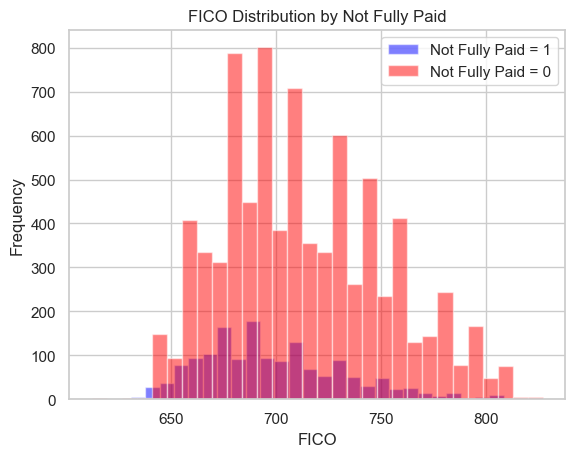

In [32]:
loans[loans['not.fully.paid'] == 1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='Not Fully Paid = 1')
loans[loans['not.fully.paid'] == 0]['fico'].hist(alpha=0.5, color='red', bins=30, label='Not Fully Paid = 0')

plt.xlabel('FICO')
plt.ylabel('Frequency')
plt.title('FICO Distribution by Not Fully Paid')
plt.legend()

plt.show()

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

AttributeError: 'numpy.int64' object has no attribute 'startswith'

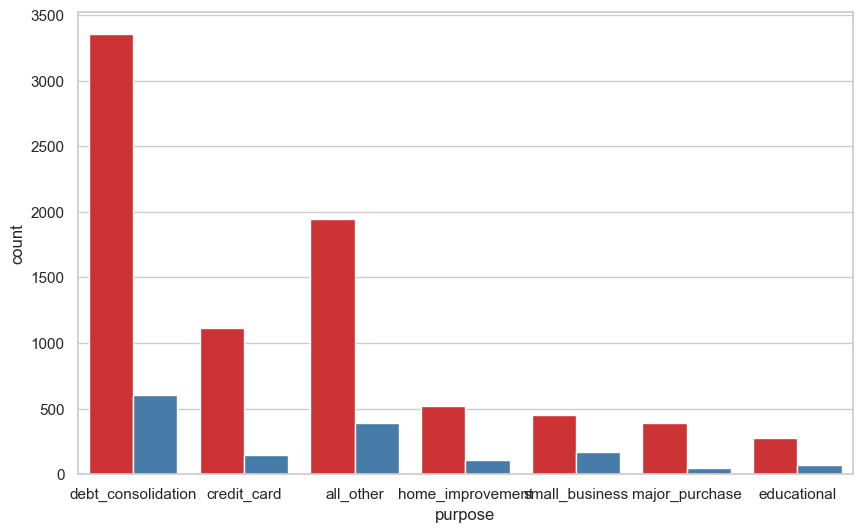

In [33]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='purpose', hue='not.fully.paid', data=loans, palette='Set1')

# Adding labels and title
plt.xlabel('Purpose of Loan')
plt.ylabel('Count')
plt.title('Count of Loans by Purpose')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.legend(title='Not Fully Paid')
plt.tight_layout()
plt.show()

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

C:\Users\Gabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


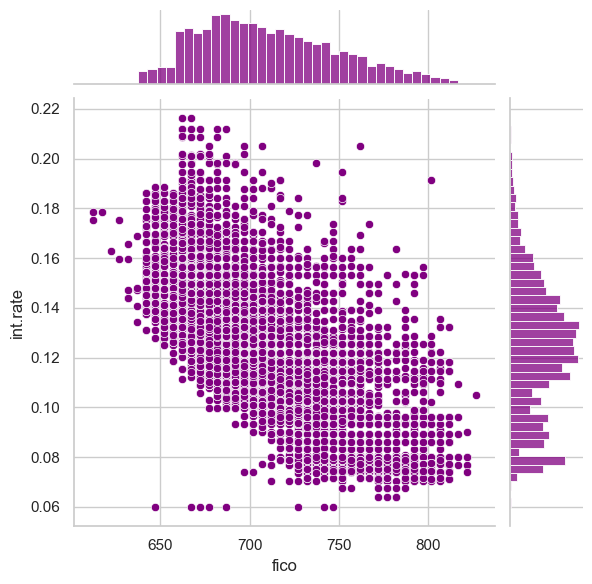

In [34]:
sns.jointplot(x='fico', y='int.rate', data=loans, kind='scatter', color='purple')

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

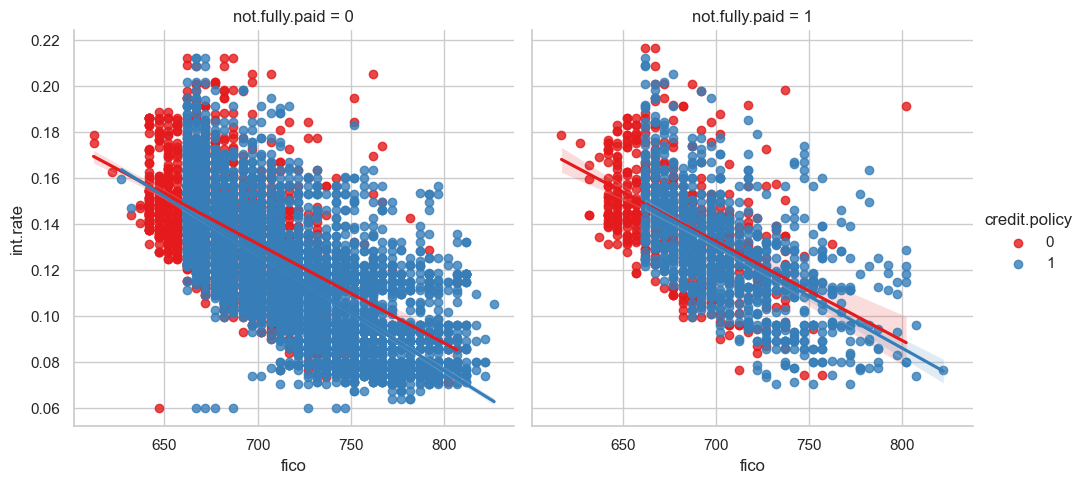

In [35]:
sns.lmplot(x='fico', y='int.rate', data=loans, col='not.fully.paid', hue='credit.policy', palette='Set1', col_wrap=2)

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [36]:
loans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [37]:
cat_feats = ['purpose']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [38]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [39]:
print(final_data.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0     

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set - X shape:", X_train.shape, "y shape:", y_train.shape)
print("Testing set - X shape:", X_test.shape, "y shape:", y_test.shape)

Training set - X shape: (6704, 18) y shape: (6704,)
Testing set - X shape: (2874, 18) y shape: (2874,)


## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [42]:
from sklearn.tree import DecisionTreeClassifier



**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [43]:
dtree = DecisionTreeClassifier()

In [44]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
predictions = dtree.predict(X_test)

In [47]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2408
           1       0.19      0.21      0.20       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.73      2874



In [48]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Confusion Matrix:
[[1993  415]
 [ 369   97]]


#### Explain, based on precision, recall and accuracy, how good/bad this model is
O modelo indica que a precisão para o modelo 0 é alta porém a do modelo 1 é baixa. O recall para ambas as classes é relativamente baixo, o que sugere que o modelo tem dificuldade em capturar todas as instâncias das classes positivas (não totalmente pagas e totalmente pagas).

Em resumo, enquanto o modelo pode ser preciso para a classe 0, ele tem dificuldade em identificar corretamente a classe 1, e a baixa sensibilidade (recall) sugere que o modelo pode estar perdendo muitas instâncias das classes positivas.

## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc = RandomForestClassifier()

In [51]:
rfc.fit(X_train, y_train)


RandomForestClassifier()

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [52]:
rfc_predictions = rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [53]:
from sklearn.metrics import classification_report

In [54]:
print("Classification Report:")
print(classification_report(y_test, rfc_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.38      0.02      0.03       466

    accuracy                           0.84      2874
   macro avg       0.61      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874



**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [55]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

**Show the Confusion Matrix for the predictions.**

In [56]:
conf_matrix = confusion_matrix(y_test, dtree.predict(X_test))
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2003  405]
 [ 372   94]]


**What performed better the random forest or the decision tree?**

In [ ]:
 Quando se trata de tempo de compilação o random forest fica na desvantagem, ja que em sua execução envolve a criação e treinamento de múltiplas árvores de decisão. Porém em quesito de precisão de resultado a random forest leva vantagem, ja que por possuir varias decision tree sua variÂncia é menor.  

# REPORT

#### 1) What is Decision Tree algorithim for?

##### 2) What is Random Forest algorithim for?

#### 3) How can you figure out how and when apply one or the other?

#### 4) Describe step by step what these two classifier do and the meaning of their results

#### 5) Of course, do not forget to give at least one real example for each one 

## Deliver this report through the AVA system by 25th of april/24 @ 20:20 ... (do not forget it too!!!)


In [57]:
1) A Árvore de Decisão é um algoritmo de aprendizado de máquina usado para resolver problemas de classificação e regressão. 
Ele cria uma estrutura de árvore em que cada nó representa uma característica ou atributo,
e cada ramo representa uma possível resposta para essa característica. O algoritmo aprende a melhor forma de dividir os dados em cada nó da árvore, 
de modo a minimizar a impureza nos grupos resultantes.

SyntaxError: unmatched ')' (2546994233.py, line 1)

In [1]:
2) O Random Forest é um algoritmo de aprendizado de máquina que utiliza várias árvores de decisão para realizar previsões, levando em conta diversas variáveis. Isso permite previsões mais complexas e precisas.
Cada árvore é treinada de forma independente e, depois, são combinadas para criar um modelo coletivo. A combinação pode ser feita por votação, no caso de problemas de classificação, 
onde o objetivo é determinar a classe de uma observação. Para problemas de regressão, o objetivo é prever o valor de uma variável com base em suas características, e a combinação é feita pela média das previsões individuais das árvores.
Esse método de usar várias árvores aumenta a precisão do modelo e reduz o risco de overfitting (ajuste excessivo).

SyntaxError: unmatched ')' (2825974969.py, line 1)

In [2]:
3)A escolha de qual algoritmo usar depende de diversos fatores, como a complexidade dos dados, o resultado desejado, a capacidade computacional disponível e a natureza das informações.
Em geral, optamos pela Decision Tree quando trabalhamos com conjuntos de dados menores e com poucas variáveis,
pois esse algoritmo é mais rápido e exige menos recursos para modelos simples devido à sua simplicidade.
Por outro lado, ao lidar com grandes volumes de dados e informações mais complexas com um maior número de variáveis, 
usamos o Random Forest. Esse método pode dividir o problema em sub-árvores, facilitando a interpretação e análise das tarefas pelo algoritmo, embora isso acarrete um custo computacional maior.

SyntaxError: unmatched ')' (715921905.py, line 1)

In [3]:
4) decision tree, este algoritmo começa com uma divisão de dados, selecionando a caracteristica ou atributo que melhor divide os dados em grupos. 
Após isso cria nós com base nessa caracteristica, representando uma decisão com base em um atributo.
pra cada nó se calcula o ganho de informação.
o processo e repetido até que todos nós estejam puros ou até que algum criterio de parada seja atendido.
E por fim é gerado o resultado, o caminho percorrido da raiz até a folha determina a classe prevista, podendo ser visualmente visto.

Random forest: inicia com a construção da floresta, que e composta por varias arvores de decisão, onde cada arvore é treinada em uma amostra aleatoria de dados, chamada bootstrap, ele garante que cada arvore seja diferente.
Após isso é feita a classificação, a floresta analisa individualmente cada arvore e determina a classe final, sendo a classe mais frequente entre todas as arvores.
E por fim a interpretação dos resultados, onde é um pouco mais complexo que a de uma arvore, sendo mais difícil entender a influência de características individuais nas decisões de classificação, e possuindo uma precisão melhor que a de uma arvore simples.

SyntaxError: unmatched ')' (3311061727.py, line 1)

In [ ]:
5) decision tree: Um exemplo seria um banco automatizando aprovação de emprestimo, tendo como caracteristicas do cliente dados como: renda, historico de credito e idade.
Quando o cliente solicitar o emprestimo o algoritmo ira passar seus dados pelo arvore e verificar se o resultado será aprovado ou não aprovado.

Random Forest: Previsão de valor de imovel, os dados são separados em caracteristicas como: localização, numero de quartos, tamanho etc...
e dessa forma pode se classificar e obter o preço de venda da propriedade.